## $\Large{Numpy\; Exercise\; Advanced}$

對Numpy的套件使用還熟悉嗎? 以下列了一些更進階的題目，解法可能不只有一種，請大家練習看看吧。解答部分我們會提供參考答案，但只要能夠符合題目要求就是好方法唷。

註：有些函數或方法的使用可能需要看官方文件的說明或是額外搜尋作法，希望在這邊也同時培養大家在遇到現階段自己不會的函數時能夠快速搜尋到解決辦法的能力。

- [Numpy 官方文件](https://docs.scipy.org/doc/numpy/reference/)

In [1]:
import numpy as np

---
# Example Data 1

下面記錄了20名助教的身高、體重，為了判斷助教們的身體健康狀況，請計算每一位助教的BMI值並且計算這20名助教們過輕或過重的比例

### Tips
    根據衛生福利部國民健康署，成人的BMI低於18.5代表過輕，高於24代表過重

In [2]:
height = [175, 180, 182, 171, 178, 173, 168, 180, 179, 173, 170, 173, 169, 177, 172, 176, 172, 176, 179, 174]
weight = ['69kg', '85kg', '73kg', '56kg', '62kg', '67kg', '61kg', '55kg', '93kg', '80kg', '76kg', '59kg', '70kg', '78kg', '63kg', '73kg', '66kg', '68kg', '63kg', '90kg']

In [3]:
# 將身高轉成np.array 並將單位換成公尺
height_m = np.array(height) / 100

# 將體重中的kg字串刪除，轉為np.array且指定資料型態是整數
weight_kg = np.array([string.split('kg')[0] for string in weight], dtype='int')

# 計算每一位助教的BMI數值
bmi = np.divide(weight_kg, height_m ** 2)

In [4]:
# 判斷每一個bmi是否高於24或低於18.5
condition = np.logical_or(bmi >= 24, bmi < 18.5)

# 不使用numpy 內建函數的話也可以這樣寫  (bmi>=24)|(bmi<18.5)

# 將判斷後的結果取平均
print('有 {:.2f} 的助教BMI過重或過輕'.format(np.mean(condition)))

有 0.40 的助教BMI過重或過輕


---
# Example Data 2

請寫出一個函數，在輸入一組數字後，會依照以下規則產生二維陣列。

In [5]:
# 範例輸入 [5, 2]

# 範例輸出 np.array([[1, 2, 3, 4, 5],
#                   [1, 2, 0, 0, 0]])


# 範例輸入 [2, 4, 3]

# 範例輸出 np.array([[1, 2, 0, 0],
#                   [1, 2, 3, 4],
#                   [1, 2, 3, 0]])

In [6]:
def list_to_array(number_list):

    max_ = np.max(number_list)
    result_ls = []

    for i in number_list:
        arange_ = np.arange(1, i+1)
        arange_ = np.pad(arange_, pad_width=(0, max_-i), mode='constant')
        result_ls.append(arange_)

    return np.array(result_ls)

In [7]:
list_to_array([5, 2])

array([[1, 2, 3, 4, 5],
       [1, 2, 0, 0, 0]])

---
# Image Processing

下面已經幫大家將一張照片讀取為np.array物件，我們可以看到目前此圖片是彩色的，請大家使用numpy套件將此圖片改為灰階並呈現出來。

### Tips：
    
    圖片有長、寬、以及色彩，因此讀取成陣列也會有三個維度
    此張圖片的長寬皆為316，另外在色彩維度上有RGB(紅、綠、藍)三個色彩的數值，在圖片資料上就是以此代表每個像素(pixel)的顏色
    
    灰階圖片中，圖片的色彩維度同樣有三個數字(RGB)，只是三個數字的數值皆相同。
    在這邊我們可以將彩色圖片原本的色彩數值做平均，就可以得到每個像素中灰階的程度。

(316, 316, 3)


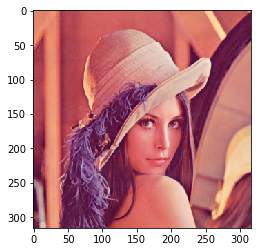

In [8]:
# 載入額外需要使用到的套件
import cv2
import matplotlib.pyplot as plt
%matplotlib inline


# 自訂畫圖函數，在此我們預設圖片皆有三個維度，並且不調整cmap參數
def plot_image(img):
    plt.imshow(img)
    plt.show()


# 讀取圖片
x = cv2.imread('dataset/Lenna.jpg')


# 由於圖片有長、寬、以及色彩，因此讀取成陣列也會有三個維度
# 我們可以看到此張圖片的長寬皆為316，另外在色彩維度上有RGB三個數值
print(x.shape)


# 呈現圖片(由於matplotlib預設色彩排序為BGR，我們可以使用排序方式將陣列色彩調整成正確的順序)
plot_image(x[:, :, ::-1])

In [9]:
# 小提醒 1. 我們需要將原圖中每個像素的RGB的數值做平均以得到灰階的數值
# 小提醒 2. 由於畫圖函數預設圖片仍然需要有三個維度，因此需要將平均後的陣列再複製三份並堆疊起來
# 小提醒 3. 呈現圖片時函數預設若數值類型為浮點數(float)則應該介於0~1之間，若數值類型為整數(int)則介於0~255之間，因此平均後的陣列需要再做數值區間的縮放或是調整資料型態

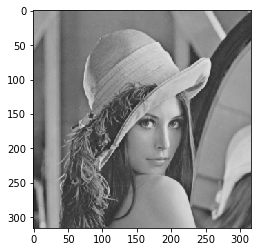

In [10]:
mean_image = x.mean(axis=2)

# 此部分也可以使用 np.expand_dims 後使用 np.tile 作堆疊
gray_image = np.stack([mean_image, mean_image, mean_image], axis=2)
gray_image = gray_image.astype('int')

plot_image(gray_image)